# Ransomware Victims
This is a notebook for interrogating the [ransomware.live](https://www.ransomware.live) API and ~~analysing~~ playing with the results

(this text here is written in markdown, like GitHub, Reddit and some blog platforms so if you double click (I think) then you can edit the formatting)

In [1]:
# requests is a library for making HTTP requests
import requests

In [2]:
#API enpoint
url ="https://api.ransomware.live/recentvictims" 

In [3]:
#It's literally this easy to get a list of recent ransomware victims into python
response = requests.get(url)

### available data

In [4]:
#so now i have an array of records of victims. 
#this is just looking at a single entry in that array to see what info is available in a record
response.json()[0]

{'country': '',
 'description': 'Doprastav, JSC is a modern construction company with the history of more than half a century which is capable to offer the construction of buildings and structures of any kind.For each investor the  Doprastav, JSC trademark represents a guarantee...',
 'discovered': '2024-02-13 14:41:33.820732',
 'group_name': 'lockbit3',
 'post_title': 'doprastav.sk',
 'post_url': 'http://lockbitapt2d73krlbewgv27tquljgxr33xbwwsp6rkyieto7u4ncead.onion/post/0vTNsQOLxrzlp6TF65cb72ecc8fe1',
 'published': '2024-02-13 13:47:00.000000',
 'screenshot': 'https://images.ransomware.live/screenshots/posts/c3f2800d3ba74d8256d51436f678d22a.png',
 'website': ''}

In [5]:
#how many records?
print(len(response.json()))

100


In [6]:
#cool so go through all 100 victims and print the title of the post
for victim in response.json():
    print(victim['post_title'])

doprastav.sk
Trans-Northern Pipelines
ArcisGolf
The Source
New Indy Containerboard
Procopio
Herrs
Sanok Rubber CompanySpólka Akcyjna
Satse
auruminstitute.org
garonproducts.com
Antunovich Associates
DHX–Dependable Hawaiian Express
Forgepresion.com
bv*********.com
ga*******.com
Rush Energy Services Inc [You have 48 hours]
SERCIDE
Lower Valley Energy, Inc
Modern Kitchens 
germaintoiture.fr
vhprimary.com
Kreyenhop & Kluge
silverairways.com
textiles.org.tw
cabc.com.ar
plexustelerad.com
isspol.gov
fidcornelis.be
parkhomeassist.co.uk
paltertonprimary.co.uk
camarotto.it
sealco-leb.com
envie.org
dienerprecisionpumps.com
lyon.co.uk
grotonschools.org
robs.org
jacksonvillebeach.org
Kadac Australia
Arlington Perinatal Associates
Freedom Munitions
Allmetal Inc.
Disaronno International
Amoskeag Network Consulting Group LLC
lacolline-skincare.com
Upper Merion Township
YKP LTDA
Village of Skokie
Lancaster County Sheriff's Office
SOPEM Tunisie
SOPEM
Benchmark Management Group
Nastech
Impact Energy Servi

In [7]:
#and now i want to count prevalence of different groups
group_counts = {}
for victim in response.json():
    group_name = victim['group_name']
    if group_name not in group_counts:
        group_counts[group_name] = 0
    group_counts[group_name] += 1

In [8]:
group_counts

{'lockbit3': 40,
 'alphv': 12,
 'akira': 3,
 'hunters': 14,
 'threeam': 1,
 'blacksuit': 3,
 'knight': 1,
 'cloak': 3,
 'medusa': 3,
 'meow': 4,
 'qilin': 3,
 'ransomhub': 1,
 'abyss': 2,
 'incransom': 1,
 'bianlian': 5,
 'blackbasta': 1,
 'cactus': 1,
 '8base': 1,
 'werewolves': 1}

### next i'll plot the results
for this one you need `matplotlib` installed
let's try some magic to install it from the notebook

(a % sign is a magic symbol that does non-python things)

In [ ]:
%pip install matplotlib

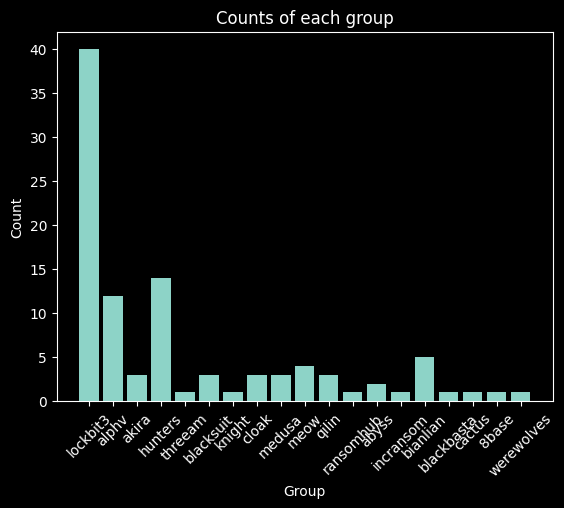

In [9]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize the counts
plt.bar(group_counts.keys(), group_counts.values())
# Rotate the x-axis labels by 45 degrees or else it gets all bunched up
plt.xticks(rotation=45)
# Add labels and a title
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Counts of each group')
# Display the chart
plt.show()